In [3]:
import pandas as pd

주정차위반단속=pd.read_csv("경기도 수원시_주정차위반단속위치현황_20231201.csv", encoding="cp949")

In [5]:
print(주정차위반단속)

        집계년도  시군명 관리기관명            단속일시정보   단속방법     데이터기준일자  \
0       2022  수원시  권선구청   2022-01-01 0:33  국민신문고  2023-12-01   
1       2022  수원시  장안구청   2022-01-01 8:11    고정형  2023-12-01   
2       2022  수원시  권선구청   2022-01-01 8:48  국민신문고  2023-12-01   
3       2022  수원시  권선구청   2022-01-01 8:57  국민신문고  2023-12-01   
4       2022  수원시  장안구청   2022-01-01 9:00    고정형  2023-12-01   
...      ...  ...   ...               ...    ...         ...   
794733  2023  수원시  권선구청  2023-10-31 23:40  국민신문고  2023-12-01   
794734  2023  수원시  권선구청  2023-10-31 23:40  국민신문고  2023-12-01   
794735  2023  수원시  영통구청  2023-10-31 23:43  주민신고제  2023-12-01   
794736  2023  수원시  권선구청  2023-10-31 23:45  국민신문고  2023-12-01   
794737  2023  수원시  권선구청  2023-10-31 23:53  국민신문고  2023-12-01   

                          단속장소  
0                 수원시 권선동 1124  
1             수원시 하광교동 광교주차장입구  
2               수원시 세류동 1159-2  
3                  수원시 구운동 583  
4              수원시 영화동 장안문거북시장  
...                        ...  


In [12]:
# 날짜 컬럼이 문자열이면 datetime으로 변환
주정차위반단속["단속일시정보"] = pd.to_datetime(주정차위반단속["단속일시정보"])

# 기준일 설정
cutoff = pd.to_datetime("2022-08-21 23:59:59")

# 2022-08-21까지
df_8before = 주정차위반단속[주정차위반단속["단속일시정보"] <= cutoff]

# 2022-08-22부터
df_8after = 주정차위반단속[주정차위반단속["단속일시정보"] > cutoff]

print(df_8before)
print(df_8after)

        집계년도  시군명 관리기관명              단속일시정보   단속방법     데이터기준일자  \
0       2022  수원시  권선구청 2022-01-01 00:33:00  국민신문고  2023-12-01   
1       2022  수원시  장안구청 2022-01-01 08:11:00    고정형  2023-12-01   
2       2022  수원시  권선구청 2022-01-01 08:48:00  국민신문고  2023-12-01   
3       2022  수원시  권선구청 2022-01-01 08:57:00  국민신문고  2023-12-01   
4       2022  수원시  장안구청 2022-01-01 09:00:00    고정형  2023-12-01   
...      ...  ...   ...                 ...    ...         ...   
252804  2022  수원시  팔달구청 2022-08-21 22:52:00  국민신문고  2023-12-01   
252805  2022  수원시  영통구청 2022-08-21 23:00:00  국민신문고  2023-12-01   
252806  2022  수원시  권선구청 2022-08-21 23:20:00  국민신문고  2023-12-01   
252807  2022  수원시  영통구청 2022-08-21 23:59:00  국민신문고  2023-12-01   
252808  2022  수원시  영통구청 2022-08-21 23:59:00  국민신문고  2023-12-01   

                        단속장소  
0               수원시 권선동 1124  
1           수원시 하광교동 광교주차장입구  
2             수원시 세류동 1159-2  
3                수원시 구운동 583  
4            수원시 영화동 장안문거북시장  
...                  

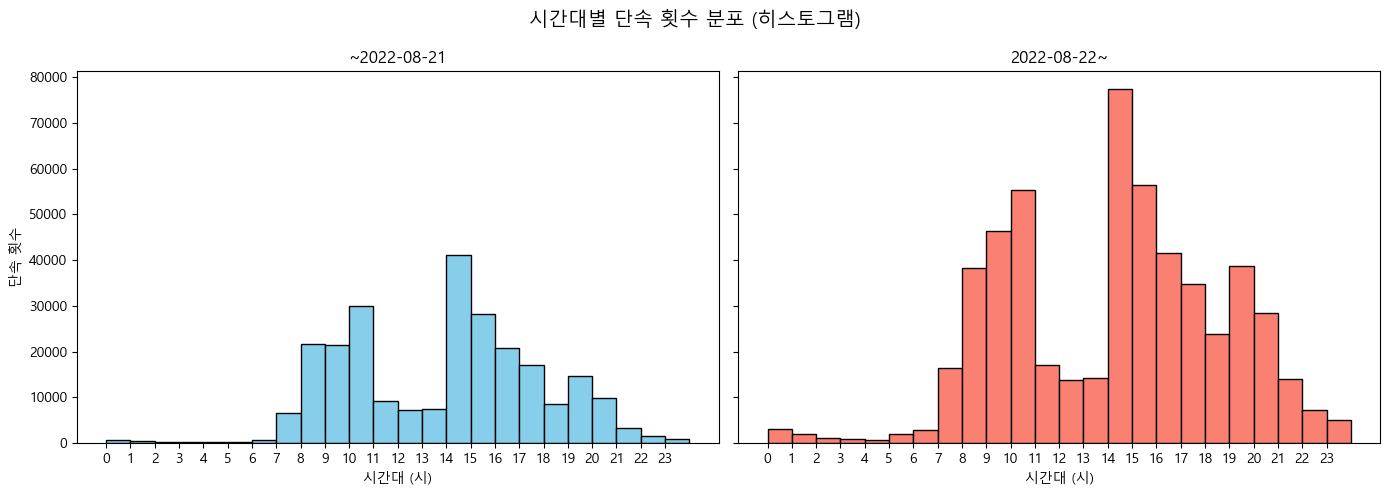

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

# ✅ 한글 폰트 설정 (Windows: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# 1️⃣ 2022-08-21까지
axes[0].hist(df_8before["단속일시정보"].dt.hour,
             bins=range(25), edgecolor="black", color="skyblue")
axes[0].set_xticks(range(24))
axes[0].set_xlabel("시간대 (시)")
axes[0].set_ylabel("단속 횟수")
axes[0].set_title("~2022-08-21")

# 2️⃣ 2022-08-22 이후
axes[1].hist(df_8after["단속일시정보"].dt.hour,
             bins=range(25), edgecolor="black", color="salmon")
axes[1].set_xticks(range(24))
axes[1].set_xlabel("시간대 (시)")
axes[1].set_title("2022-08-22~")

plt.suptitle("시간대별 단속 횟수 분포 (히스토그램)", fontsize=14)
plt.tight_layout()
plt.show()


~2022-08-21: 2022-01-01 00:33:00 → 2022-08-21 23:59:00
2022-08-22~12-31: 2022-08-22 00:14:00 → 2022-12-31 23:58:00


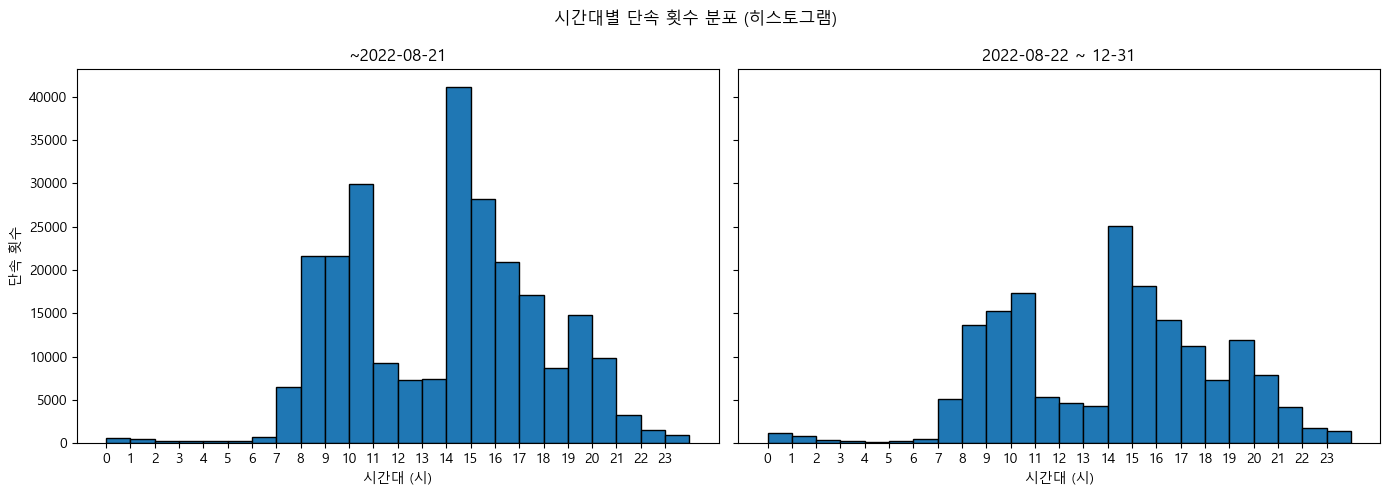

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# 1) 새 기간 필터: 2022-08-22 00:00:00 ~ 2022-12-31 23:59:59 (양끝 포함)
start = pd.to_datetime("2022-08-22 00:00:00")
end   = pd.to_datetime("2022-12-31 23:59:59")
df_2022h2 = 주정차위반단속[
    (주정차위반단속["단속일시정보"] >= start) &
    (주정차위반단속["단속일시정보"] <= end)
].copy()

# 2) 확인(선택)
print("~2022-08-21:", df_8before["단속일시정보"].min(), "→", df_8before["단속일시정보"].max())
print("2022-08-22~12-31:", df_2022h2["단속일시정보"].min(), "→", df_2022h2["단속일시정보"].max())

# 3) 히스토그램 (좌: ~8/21, 우: 8/22~12/31)
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# 왼쪽: ~2022-08-21
axes[0].hist(df_8before["단속일시정보"].dt.hour,
             bins=range(25), edgecolor="black")
axes[0].set_xticks(range(24))
axes[0].set_xlabel("시간대 (시)")
axes[0].set_ylabel("단속 횟수")
axes[0].set_title("~2022-08-21")

# 오른쪽: 2022-08-22 ~ 2022-12-31
axes[1].hist(df_2022h2["단속일시정보"].dt.hour,
             bins=range(25), edgecolor="black")
axes[1].set_xticks(range(24))
axes[1].set_xlabel("시간대 (시)")
axes[1].set_title("2022-08-22 ~ 12-31")

plt.suptitle("시간대별 단속 횟수 분포 (히스토그램)")
plt.tight_layout()
plt.show()


2022 기간: 2022-01-01 00:33:00 → 2022-08-21 23:59:00
2023 기간: 2023-01-01 00:23:00 → 2023-08-21 23:48:00


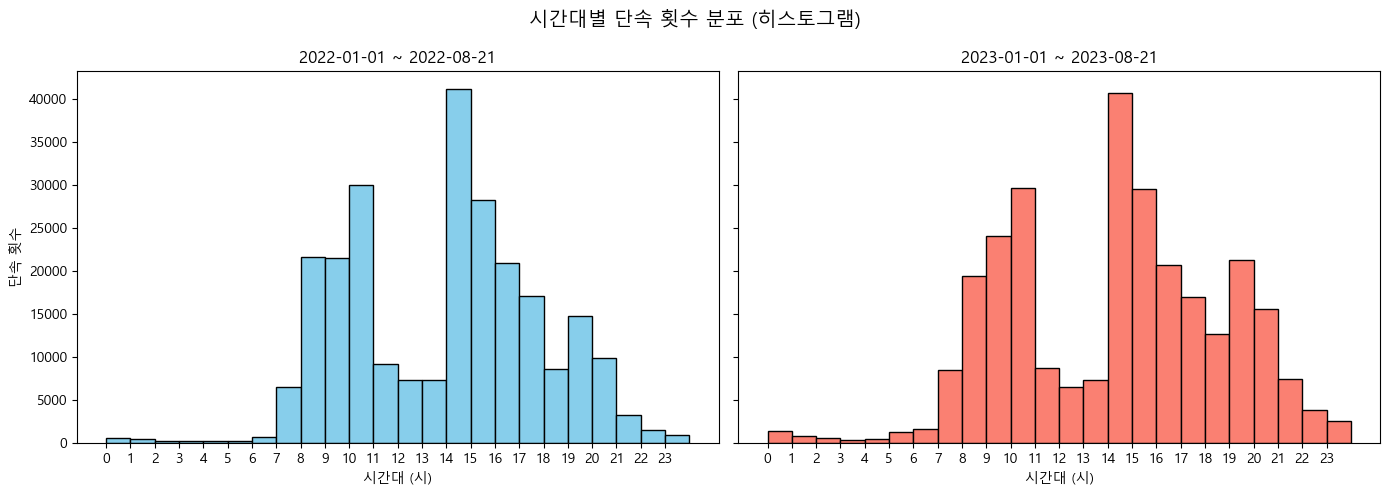

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 기간 설정
p1_start = pd.to_datetime("2022-01-01 00:00:00")
p1_end   = pd.to_datetime("2022-08-21 23:59:59")

p2_start = pd.to_datetime("2023-01-01 00:00:00")
p2_end   = pd.to_datetime("2023-08-21 23:59:59")

# ✅ 데이터 필터링
df_2022_p1 = 주정차위반단속[
    (주정차위반단속["단속일시정보"] >= p1_start) &
    (주정차위반단속["단속일시정보"] <= p1_end)
].copy()

df_2023_p1 = 주정차위반단속[
    (주정차위반단속["단속일시정보"] >= p2_start) &
    (주정차위반단속["단속일시정보"] <= p2_end)
].copy()

# ✅ 데이터 범위 확인
print("2022 기간:", df_2022_p1["단속일시정보"].min(), "→", df_2022_p1["단속일시정보"].max())
print("2023 기간:", df_2023_p1["단속일시정보"].min(), "→", df_2023_p1["단속일시정보"].max())

# ✅ 히스토그램 그리기
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# 2022
axes[0].hist(df_2022_p1["단속일시정보"].dt.hour,
             bins=range(25), edgecolor="black", color="skyblue")
axes[0].set_xticks(range(24))
axes[0].set_xlabel("시간대 (시)")
axes[0].set_ylabel("단속 횟수")
axes[0].set_title("2022-01-01 ~ 2022-08-21")

# 2023
axes[1].hist(df_2023_p1["단속일시정보"].dt.hour,
             bins=range(25), edgecolor="black", color="salmon")
axes[1].set_xticks(range(24))
axes[1].set_xlabel("시간대 (시)")
axes[1].set_title("2023-01-01 ~ 2023-08-21")

plt.suptitle("시간대별 단속 횟수 분포 (히스토그램)", fontsize=14)
plt.tight_layout()
plt.show()


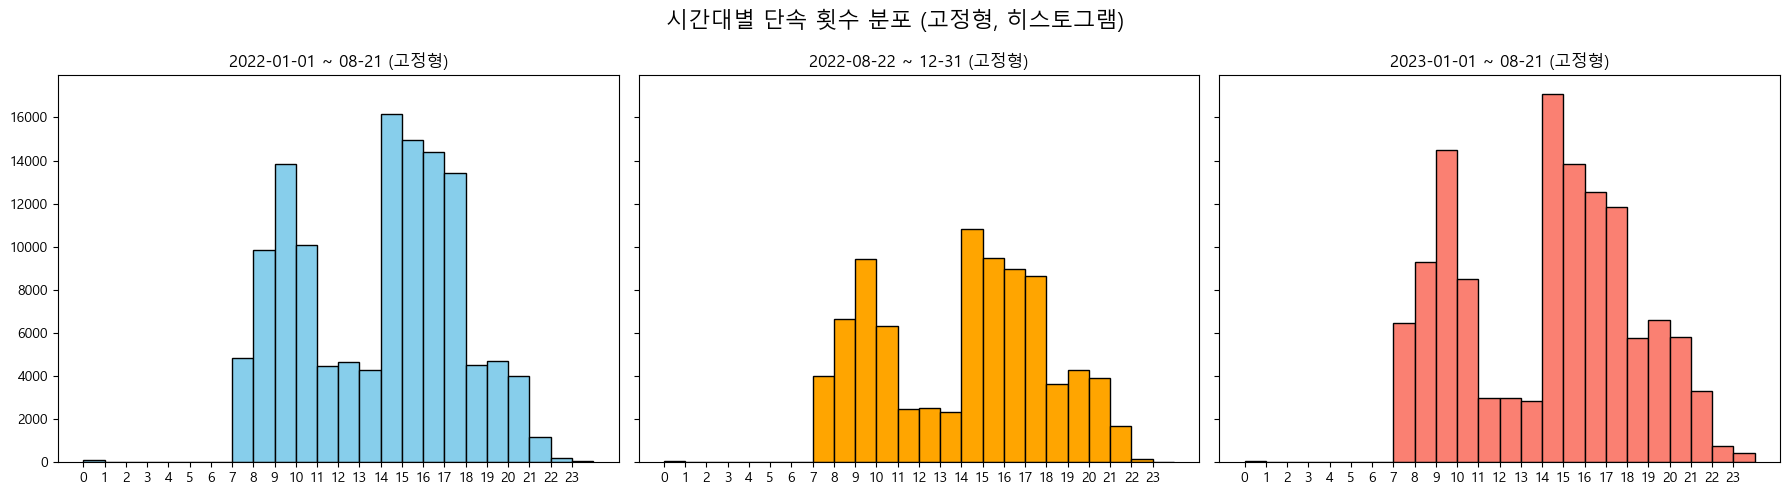

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 고정형만 필터링
df_fixed = 주정차위반단속[주정차위반단속["단속방법"] == "고정형"].copy()

# 2) 기간 설정
p1_start, p1_end = pd.to_datetime("2022-01-01"), pd.to_datetime("2022-08-21 23:59:59")
p2_start, p2_end = pd.to_datetime("2022-08-22"), pd.to_datetime("2022-12-31 23:59:59")
p3_start, p3_end = pd.to_datetime("2023-01-01"), pd.to_datetime("2023-08-21 23:59:59")

# 3) 각 구간 필터
df_2022_p1 = df_fixed[(df_fixed["단속일시정보"] >= p1_start) & (df_fixed["단속일시정보"] <= p1_end)]
df_2022_p2 = df_fixed[(df_fixed["단속일시정보"] >= p2_start) & (df_fixed["단속일시정보"] <= p2_end)]
df_2023_p1 = df_fixed[(df_fixed["단속일시정보"] >= p3_start) & (df_fixed["단속일시정보"] <= p3_end)]

# 4) 히스토그램 그리기 (3개 비교)
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

# 2022-01~08-21
axes[0].hist(df_2022_p1["단속일시정보"].dt.hour, bins=range(25), edgecolor="black", color="skyblue")
axes[0].set_xticks(range(24))
axes[0].set_title("2022-01-01 ~ 08-21 (고정형)")

# 2022-08-22 ~ 12-31
axes[1].hist(df_2022_p2["단속일시정보"].dt.hour, bins=range(25), edgecolor="black", color="orange")
axes[1].set_xticks(range(24))
axes[1].set_title("2022-08-22 ~ 12-31 (고정형)")

# 2023-01-01 ~ 08-21
axes[2].hist(df_2023_p1["단속일시정보"].dt.hour, bins=range(25), edgecolor="black", color="salmon")
axes[2].set_xticks(range(24))
axes[2].set_title("2023-01-01 ~ 08-21 (고정형)")

plt.suptitle("시간대별 단속 횟수 분포 (고정형, 히스토그램)", fontsize=16)
plt.tight_layout()
plt.show()


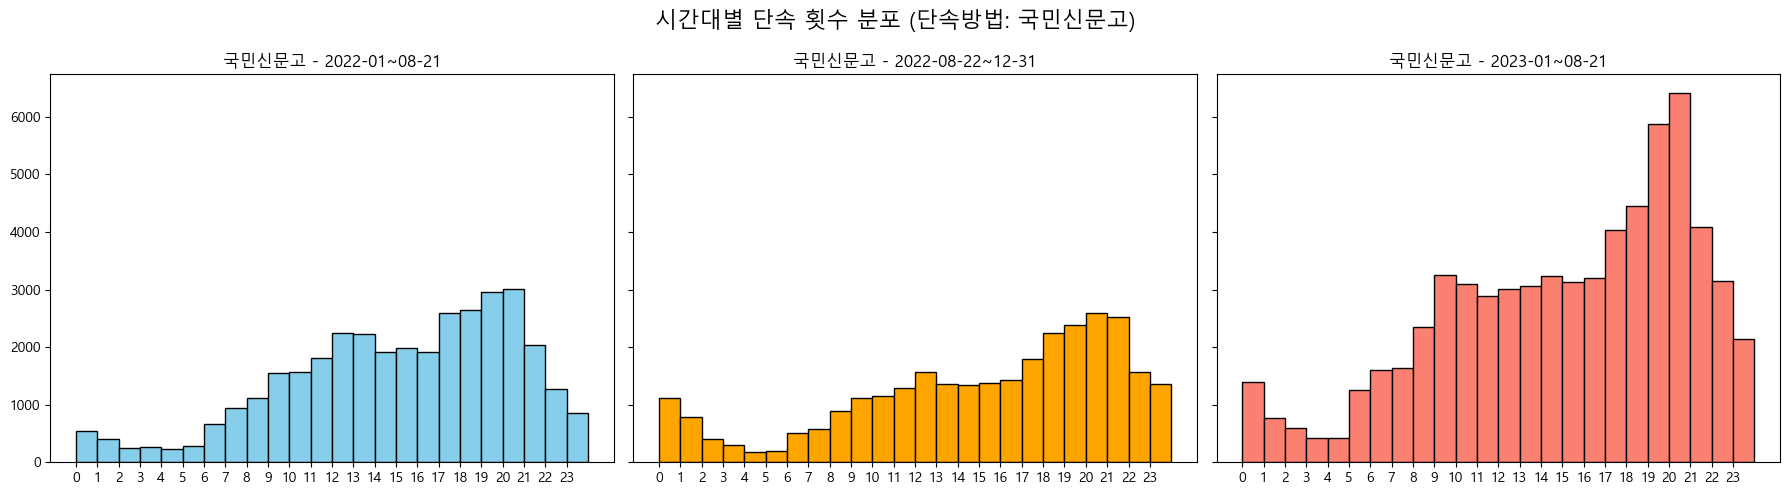

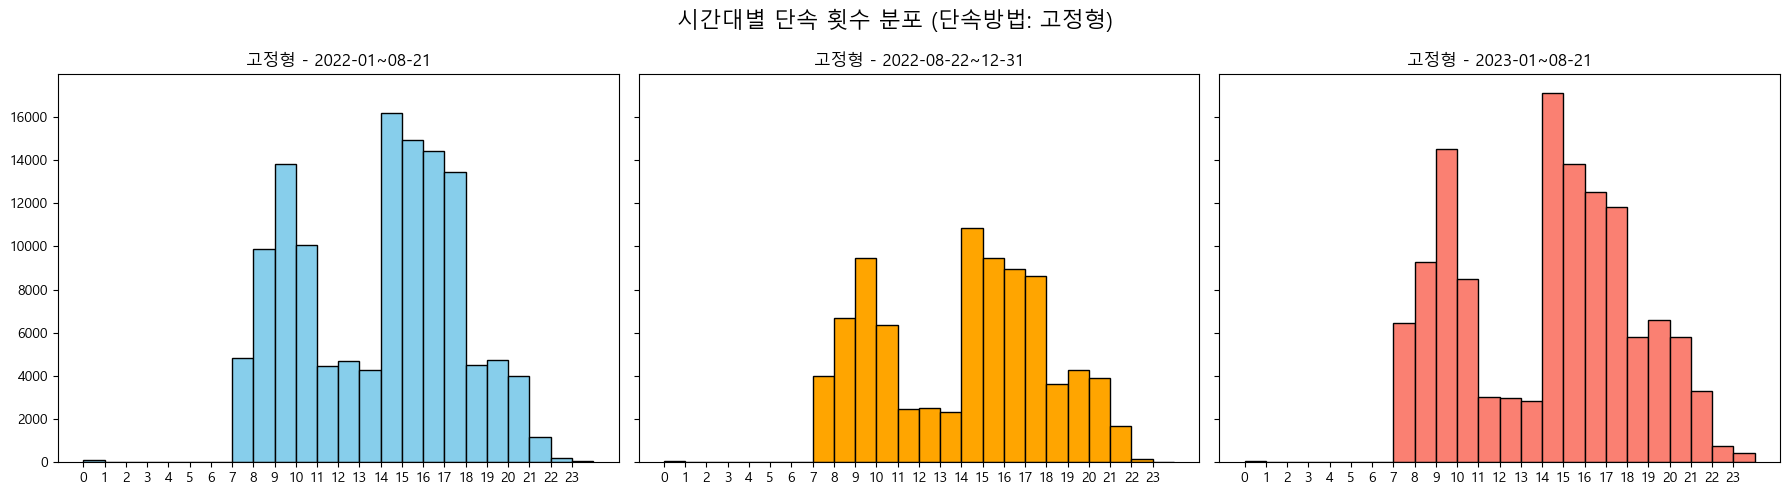

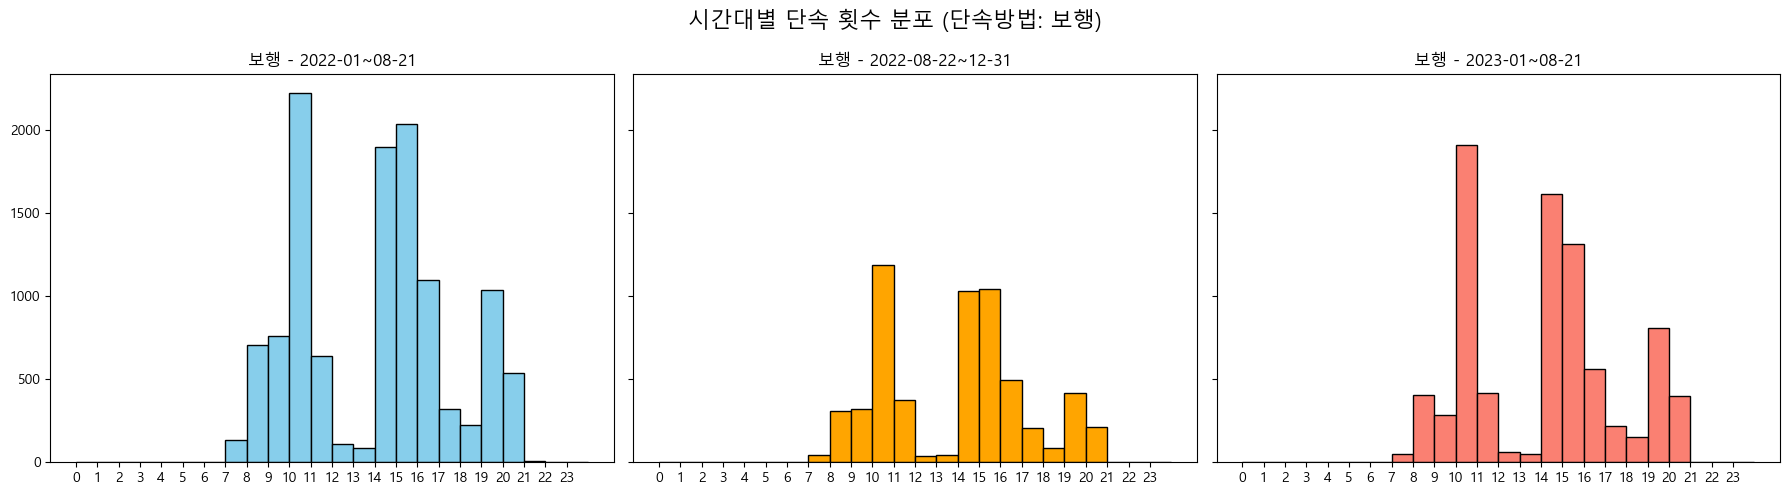

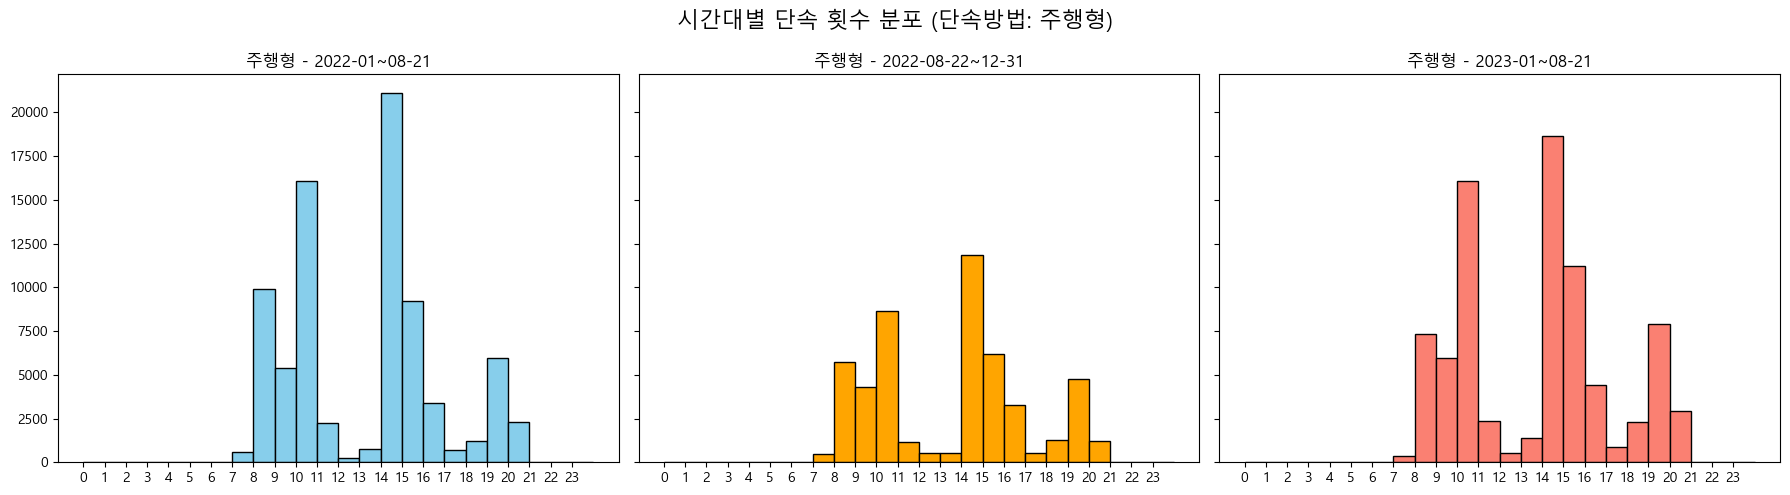

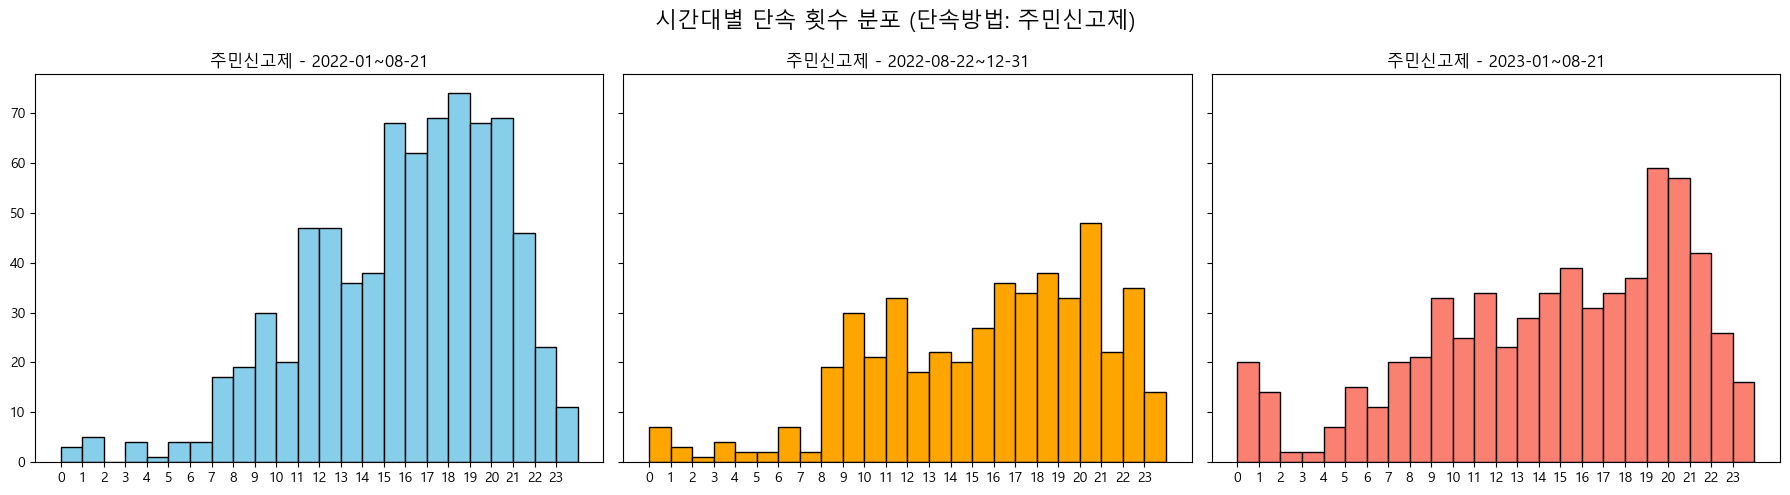

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 기간 정의
p1_start, p1_end = pd.to_datetime("2022-01-01"), pd.to_datetime("2022-08-21 23:59:59")
p2_start, p2_end = pd.to_datetime("2022-08-22"), pd.to_datetime("2022-12-31 23:59:59")
p3_start, p3_end = pd.to_datetime("2023-01-01"), pd.to_datetime("2023-08-21 23:59:59")

# 단속방법 목록
methods = 주정차위반단속["단속방법"].unique()

for method in methods:
    df_m = 주정차위반단속[주정차위반단속["단속방법"] == method].copy()

    # 기간별 필터링
    df_2022_p1 = df_m[(df_m["단속일시정보"] >= p1_start) & (df_m["단속일시정보"] <= p1_end)]
    df_2022_p2 = df_m[(df_m["단속일시정보"] >= p2_start) & (df_m["단속일시정보"] <= p2_end)]
    df_2023_p1 = df_m[(df_m["단속일시정보"] >= p3_start) & (df_m["단속일시정보"] <= p3_end)]

    # 그래프 출력
    fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

    axes[0].hist(df_2022_p1["단속일시정보"].dt.hour, bins=range(25), edgecolor="black", color="skyblue")
    axes[0].set_xticks(range(24))
    axes[0].set_title(f"{method} - 2022-01~08-21")

    axes[1].hist(df_2022_p2["단속일시정보"].dt.hour, bins=range(25), edgecolor="black", color="orange")
    axes[1].set_xticks(range(24))
    axes[1].set_title(f"{method} - 2022-08-22~12-31")

    axes[2].hist(df_2023_p1["단속일시정보"].dt.hour, bins=range(25), edgecolor="black", color="salmon")
    axes[2].set_xticks(range(24))
    axes[2].set_title(f"{method} - 2023-01~08-21")

    plt.suptitle(f"시간대별 단속 횟수 분포 (단속방법: {method})", fontsize=16)
    plt.tight_layout()
    plt.show()


C:\Users\somin\AppData\Local\Temp\ipykernel_28520\4123981208.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  주정차위반단속["단속_30분"] = 주정차위반단속["단속일시정보"].dt.floor("30T")


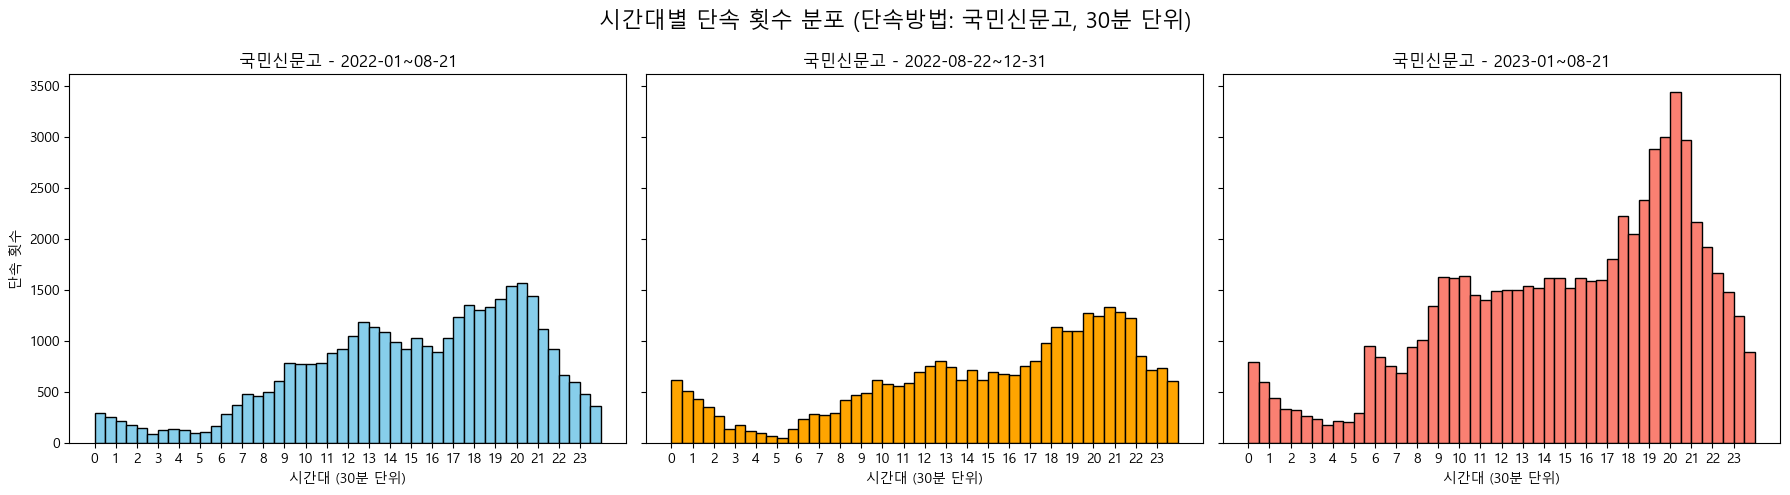

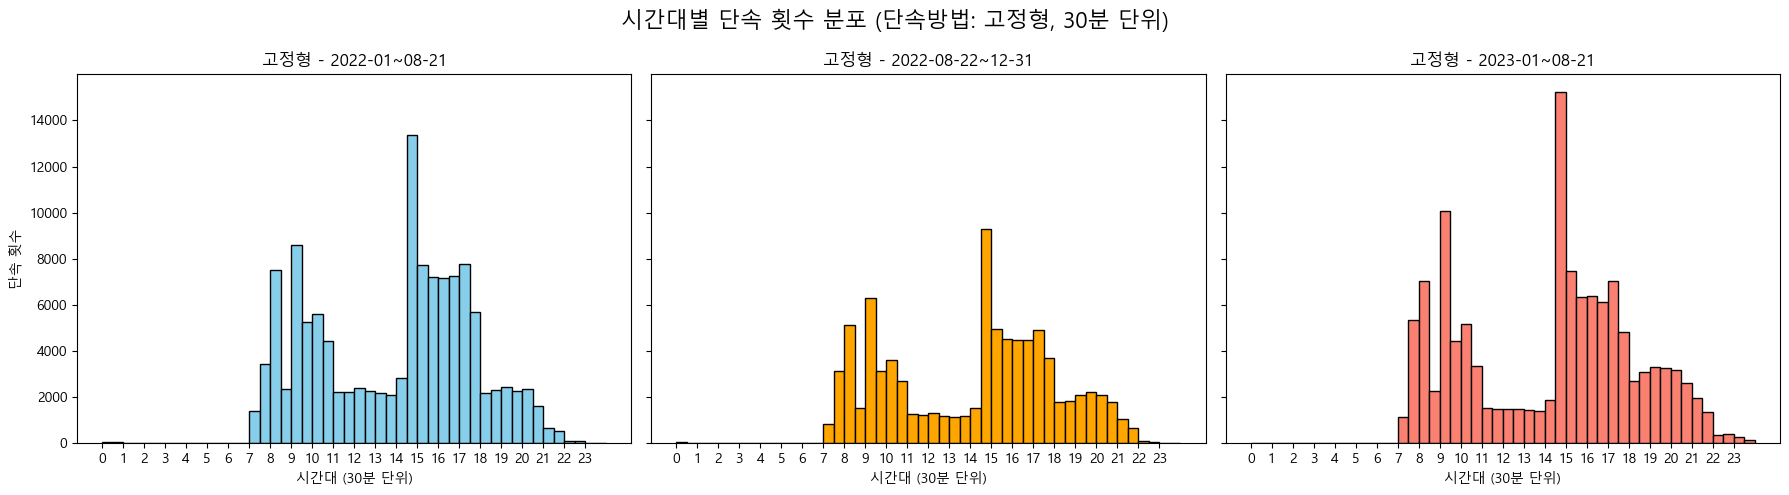

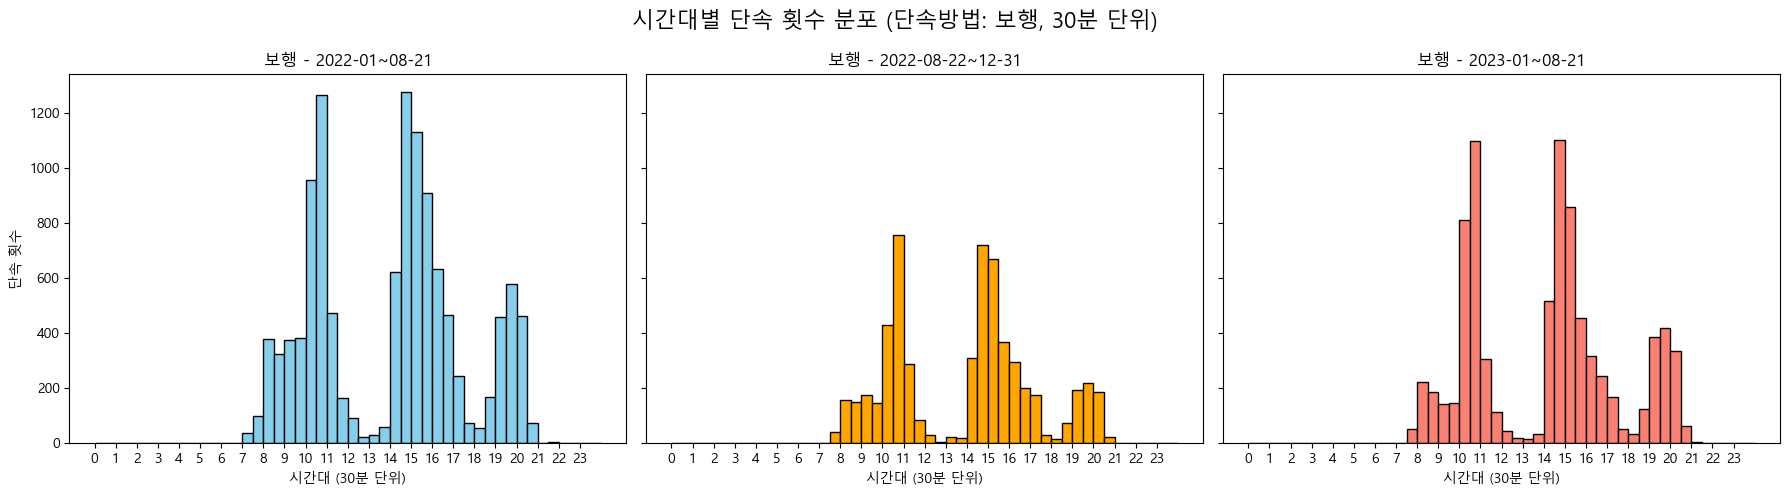

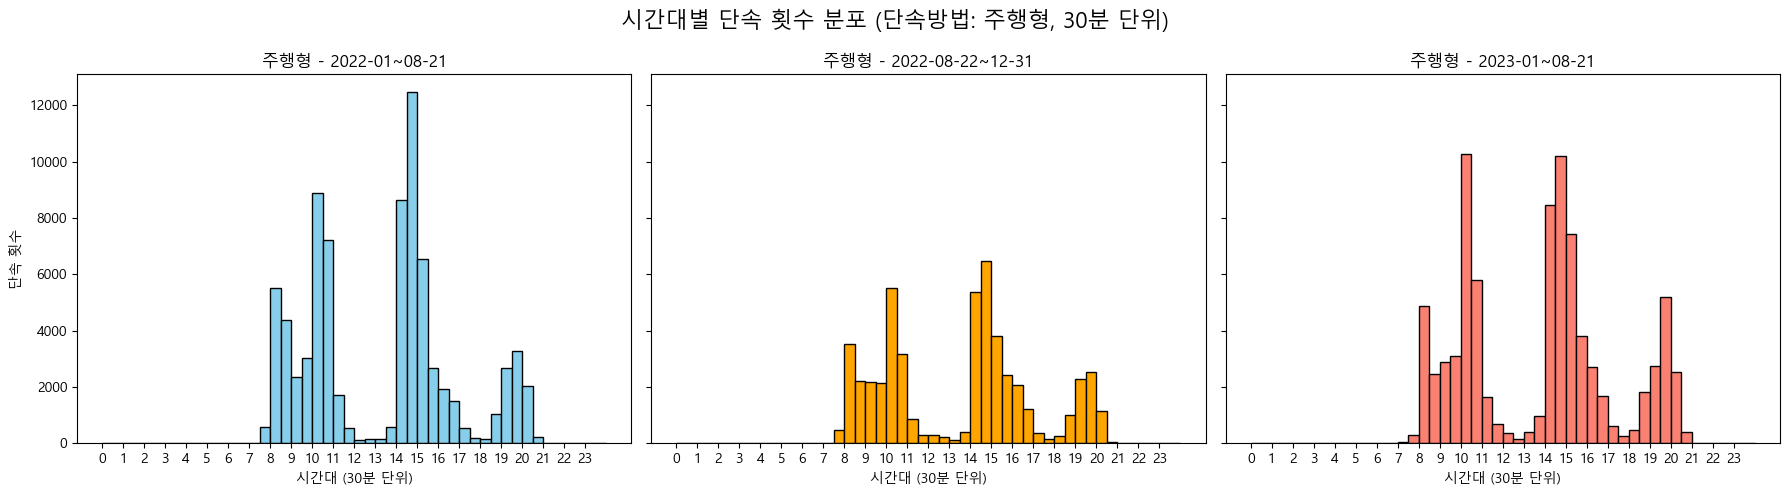

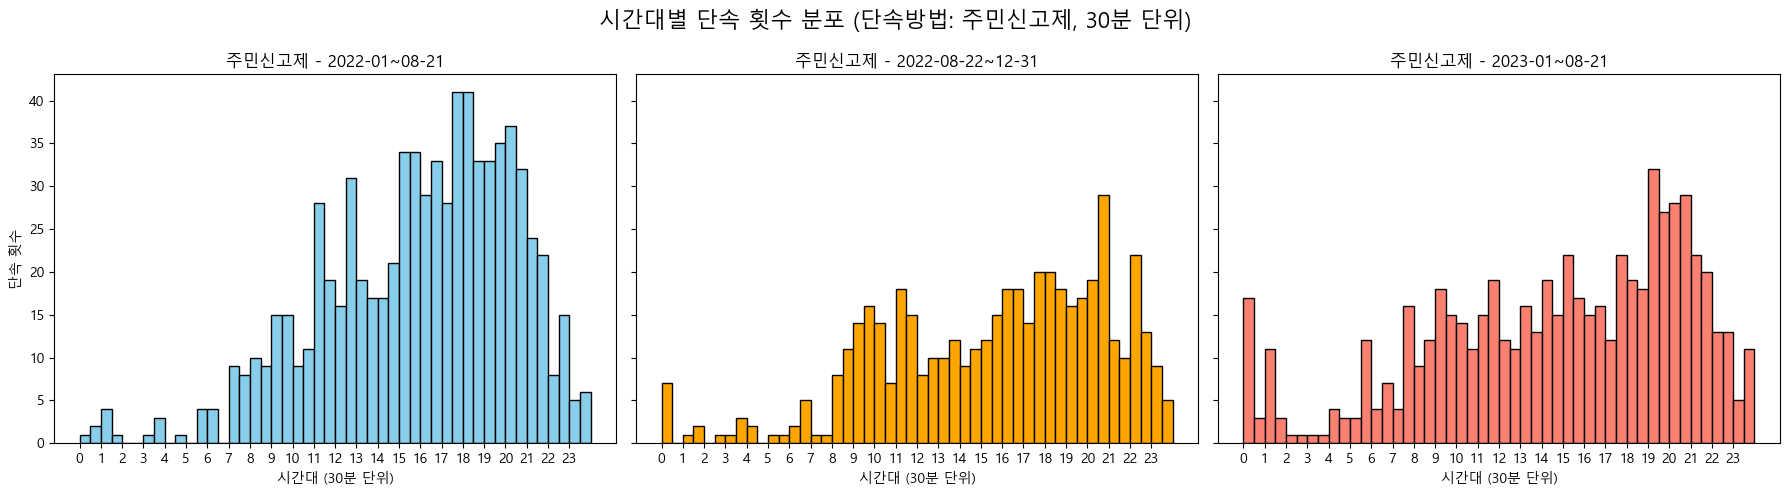

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 세팅 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 30분 단위 시간 컬럼 생성 (필요 시)
주정차위반단속["단속_30분"] = 주정차위반단속["단속일시정보"].dt.floor("30T")

# 기간 정의
p1_start, p1_end = pd.to_datetime("2022-01-01"), pd.to_datetime("2022-08-21 23:59:59")
p2_start, p2_end = pd.to_datetime("2022-08-22"), pd.to_datetime("2022-12-31 23:59:59")
p3_start, p3_end = pd.to_datetime("2023-01-01"), pd.to_datetime("2023-08-21 23:59:59")

# 단속방법 목록
methods = 주정차위반단속["단속방법"].unique()

# 각 단속방법마다 출력
for method in methods:
    df_m = 주정차위반단속[주정차위반단속["단속방법"] == method].copy()
    
    # 기간별 필터링
    df_2022_p1 = df_m[(df_m["단속일시정보"] >= p1_start) & (df_m["단속일시정보"] <= p1_end)]
    df_2022_p2 = df_m[(df_m["단속일시정보"] >= p2_start) & (df_m["단속일시정보"] <= p2_end)]
    df_2023_p1 = df_m[(df_m["단속일시정보"] >= p3_start) & (df_m["단속일시정보"] <= p3_end)]

    # 히스토그램 (3개 비교)
    fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

    # 2022-01~08-21
    axes[0].hist(df_2022_p1["단속일시정보"].dt.hour + df_2022_p1["단속일시정보"].dt.minute/60,
                 bins=[i/2 for i in range(49)], edgecolor="black", color="skyblue")
    axes[0].set_xticks(range(0,24))
    axes[0].set_title(f"{method} - 2022-01~08-21")
    axes[0].set_xlabel("시간대 (30분 단위)")
    axes[0].set_ylabel("단속 횟수")

    # 2022-08-22 ~ 12-31
    axes[1].hist(df_2022_p2["단속일시정보"].dt.hour + df_2022_p2["단속일시정보"].dt.minute/60,
                 bins=[i/2 for i in range(49)], edgecolor="black", color="orange")
    axes[1].set_xticks(range(0,24))
    axes[1].set_title(f"{method} - 2022-08-22~12-31")
    axes[1].set_xlabel("시간대 (30분 단위)")

    # 2023-01-01 ~ 08-21
    axes[2].hist(df_2023_p1["단속일시정보"].dt.hour + df_2023_p1["단속일시정보"].dt.minute/60,
                 bins=[i/2 for i in range(49)], edgecolor="black", color="salmon")
    axes[2].set_xticks(range(0,24))
    axes[2].set_title(f"{method} - 2023-01~08-21")
    axes[2].set_xlabel("시간대 (30분 단위)")

    plt.suptitle(f"시간대별 단속 횟수 분포 (단속방법: {method}, 30분 단위)", fontsize=16)
    plt.tight_layout()
    plt.show()


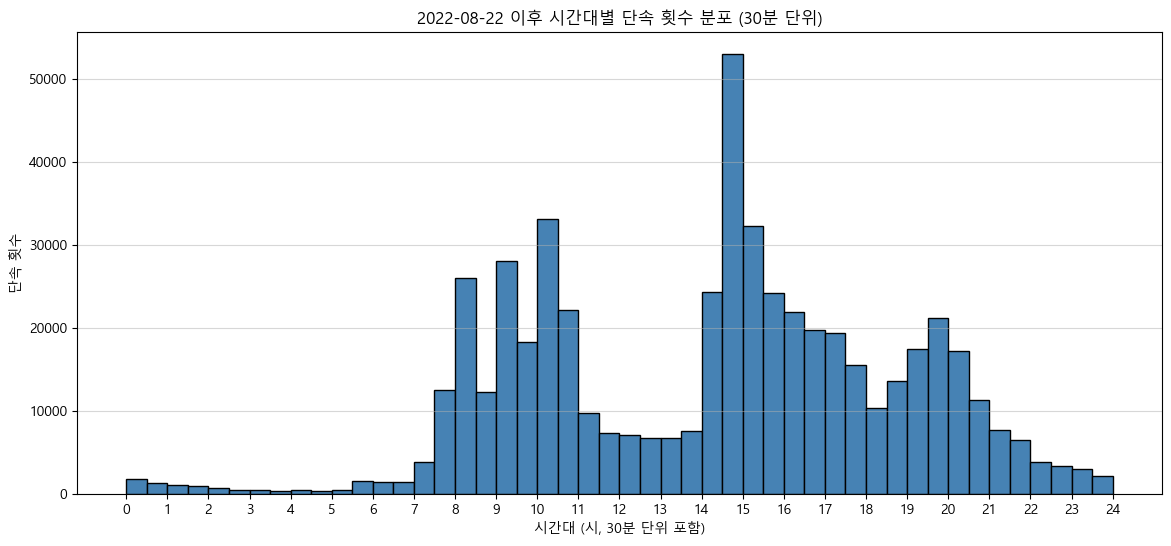

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 30분 단위 binning용 숫자 컬럼 (예: 14:30 → 14.5)
주정차위반단속["시간_30분"] = 주정차위반단속["단속일시정보"].dt.hour + 주정차위반단속["단속일시정보"].dt.minute/60

# 2022-08-22 이후 데이터만 추출
df_after = 주정차위반단속[주정차위반단속["단속일시정보"] >= "2022-08-22"].copy()

# 히스토그램 그리기 (30분 단위 = 48 bins)
plt.figure(figsize=(14,6))
plt.hist(df_after["시간_30분"], bins=[i/2 for i in range(49)],
         edgecolor="black", color="steelblue")

# x축 라벨을 보기 좋게
plt.xticks(range(0,25))
plt.xlabel("시간대 (시, 30분 단위 포함)")
plt.ylabel("단속 횟수")
plt.title("2022-08-22 이후 시간대별 단속 횟수 분포 (30분 단위)")
plt.grid(axis="y", alpha=0.5)
plt.show()


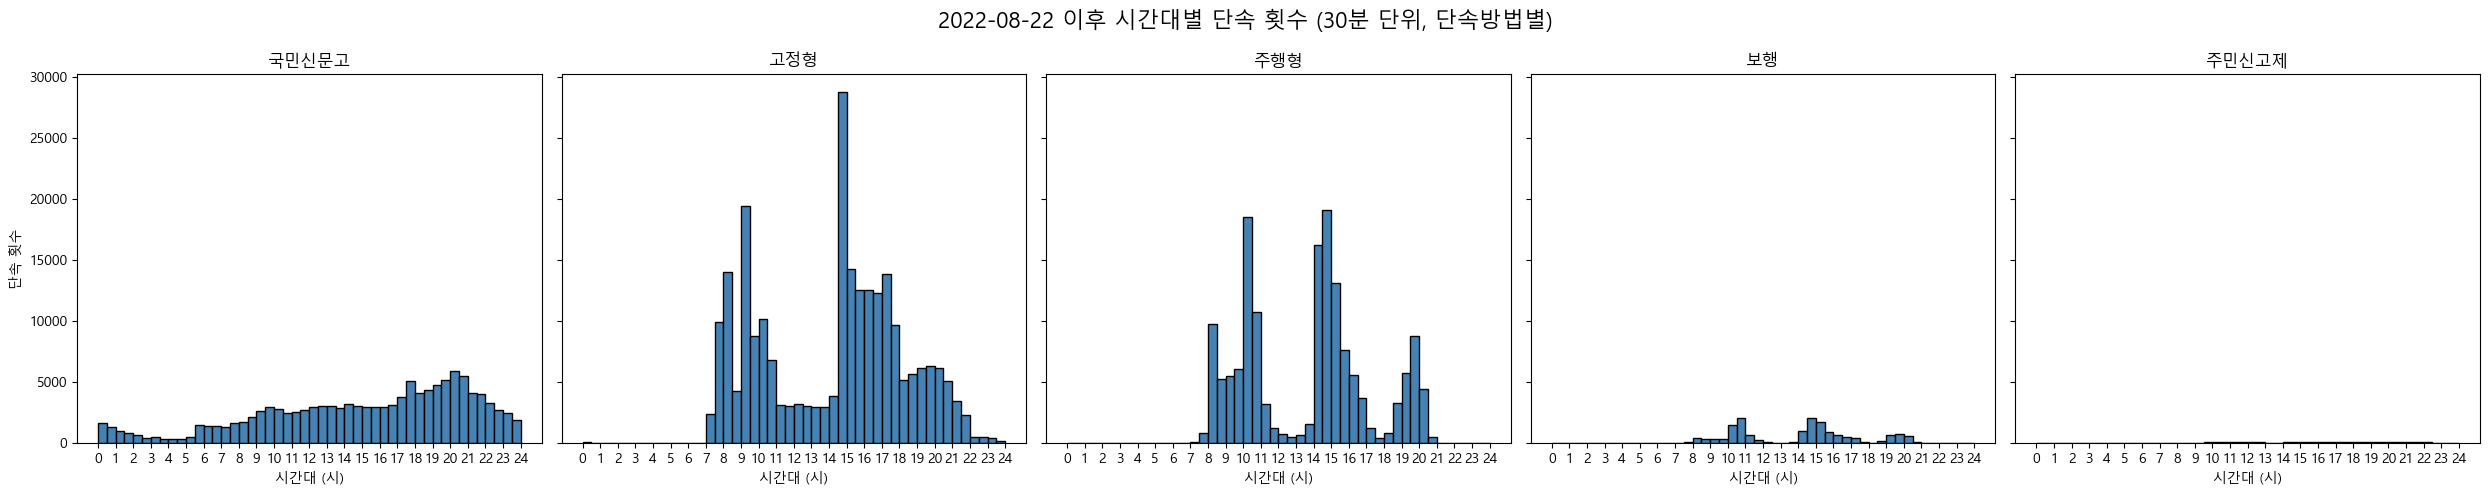

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 30분 단위 숫자 컬럼 (예: 14:30 → 14.5)
주정차위반단속["시간_30분"] = 주정차위반단속["단속일시정보"].dt.hour + 주정차위반단속["단속일시정보"].dt.minute/60

# 2022-08-22 이후 데이터
df_after = 주정차위반단속[주정차위반단속["단속일시정보"] >= "2022-08-22"].copy()

# 단속방법 목록
methods = df_after["단속방법"].unique()

# 서브플롯 (1행 5열)
fig, axes = plt.subplots(1, len(methods), figsize=(5*len(methods), 5), sharey=True)

for i, method in enumerate(methods):
    df_m = df_after[df_after["단속방법"] == method]
    axes[i].hist(df_m["시간_30분"], bins=[i/2 for i in range(49)],
                 edgecolor="black", color="steelblue")
    axes[i].set_xticks(range(0,25))
    axes[i].set_xlabel("시간대 (시)")
    if i == 0:
        axes[i].set_ylabel("단속 횟수")
    axes[i].set_title(method)

plt.suptitle("2022-08-22 이후 시간대별 단속 횟수 (30분 단위, 단속방법별)", fontsize=16)
plt.tight_layout()
plt.show()



단속 유예전후에 패턴차이는 안보였음
아무래도 단속 유예 직전에는 미리 정책을 시행하기도 하다보니 그 효과가 정책 직전을 비교해서는 모르는것같음
특이점은 단속유예를 적용하는 11시~14시30분까지의 단속이 눈에 띄게 적어진다는 것(이는 저녁시간대인 18시~21시도 마찬가지임)
이는 단속을 유예해줌으로서 많은 사람들이 특정 장소에 활동, 소비 하는 경우가 많다는 것(소상공인에게 이득이됨)
발생하는 문제점: 혼잡 및 무분별한 주차
- 고정형 문제 해결: 주정차 허용 구역을 조금더 넓게 설정, 주변 공영주차장의 점심시간, 저녁시간 전후 무료 주차 허용 확대
- 국민신문고 관련 문제 해결: 다양한 곳에서 발생하는 것을 통해 단속 루트 제공
